![](./Imgs/header.png)

[**HORTINLEA**](http://www.hortinlea.org/) (Horticultural Innovation and Learning for Improved Nutrition and Livelihood in East Africa) is an interdisciplinary research project addressing food security in East Africa, particularly in Kenya. 19 East African and German universities and research institutes work collaboratively to produce and distribute knowledge in order to increase horticultural production and consumption, especially of African leafy indigenous vegetables. The overall goal is to improve the livelihood and nutritional situation of the rural and urban poor.

Below we will work with data of the HORTINLEA Household Survey Data 2015.

## Data Exploration

#### Load Data

In [1]:
import pandas as pd
import pyreadstat
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import re

In [2]:
# Load .sav data
kenia, meta = pyreadstat.read_sav("./Data/hortilinea a.sav")

# all variables and its description
# meta.column_names_to_labels

# If variable has levels what they are?
# meta.variable_value_labels

In [3]:
# Choose a subset of variables to analyze

features = ["hhno","q11.1", "q11.1a", "q11.3", "q11.5", 'q11.11.qty', 'q11.11.units',
'q11.12', 'q11.32', 'q11.37a', 'q11.38a', 'q11.39', 'q11.43a', 'pesticide', 
"q11.8.qty", "q11.8.units"]

kenia = kenia[features]

#### Data Description

In [4]:
# Rename variables, add variable descriptions from the meta data
new_names = {"hhno":"Houshold", "q11.1":"Product", "q11.1a":"Type", 
             "q11.3":"Area", "q11.5":"Year", "q11.11.qty":"Sold_Qty", 
             "q11.11.units":"Sold_Unit", "q11.12":"Price_per_Unit", 
             "q11.32":"Fertilizer", "q11.37a":"Fertilizer_Costs_KSHS",
             "q11.38a":"Pesticide_Costs_KSHS", "q11.39":"Irrigation", 
             "q11.43a":"Irrigation_Costs_KSHS", "pesticide":"Pesticide",
             "q11.8.qty":"Produced_Qty", "q11.8.units":"Produced_Unit"}

# rename columns
kenia.columns = kenia.columns.map(new_names)

# new dictionarys that contain pairs:
# { "new name" : "value labels" },
# {"new_name": "variable label"}

variable_labels = {}
name_labels = {}
for var in features:

    name_labels[new_names[var]] = meta.column_names_to_labels[var]
    try:
        meta.variable_value_labels[var]
        variable_labels[new_names[var]] = meta.variable_value_labels[var]
    except:
        pass

# variable descriptions for subset
for name in kenia.columns:
    print(f"`{name}`: {name_labels[name]}")
    try:
        variable_labels[name]
        print(f"      Levels:{variable_labels[name]}\n")
    except:
        pass
        print("No Levels\n")

`Houshold`: Questionnaire number
No Levels

`Product`: Name of the product grown in the last 12 months including cash crops, tree crops, food crops, vegetables
      Levels:{90.0: 'Other, Specify', 101.0: 'Avocado', 102.0: 'Banana', 103.0: 'Beans', 104.0: 'Bullrush millet', 105.0: 'Cassava', 106.0: 'Coconut', 107.0: 'Coffee', 108.0: 'Cotton', 109.0: 'Ginger', 110.0: 'Grapes', 111.0: 'Green gram', 112.0: 'Groundnuts', 113.0: 'Herbs', 114.0: 'Maize', 115.0: 'Mango', 116.0: 'Millet', 117.0: 'Pears', 118.0: 'Pigeon peas', 119.0: 'Rice', 120.0: 'Simsim', 121.0: 'Sisal', 122.0: 'Sorghum', 123.0: 'Sugarcane', 124.0: 'Sun flower', 125.0: 'Sweet potatoes', 126.0: 'Wheat', 127.0: 'Tea', 201.0: 'Onions', 202.0: 'Cabbages', 203.0: 'Carrots', 204.0: 'Irish potatoes', 205.0: 'Tomatoes', 206.0: 'Spinach', 207.0: 'Capsicum (Pilipili hoho)', 208.0: 'Cucumber', 209.0: 'French beans', 210.0: 'Lettuce', 211.0: 'Cauliflower', 212.0: 'Aubergines (Eggplants)', 213.0: 'Pumpkins', 214.0: 'Okra', 215.0: 'Corian

#### Understanding the Data

How many observations/variables are in  the data set?

In [5]:
kenia.shape

(6911, 16)

Are there duplicated entries?

In [6]:
kenia.duplicated().sum()

83

Remove duplicated entries

In [7]:
kenia.drop_duplicates(inplace=True)

Replace all 'non-applicable', 'no answer', 'not applicable' etc. with `NAN` values.

In [8]:
kenia.where(kenia["Product"] != 90, inplace=True)
kenia.where(kenia["Type"] != 90, inplace=True)
kenia.where(kenia["Area"] != 98, inplace=True)
kenia.where(kenia["Area"] != 90, inplace=True)
kenia.where(kenia["Sold_Unit"] != 90, inplace=True)
kenia.where(kenia["Sold_Unit"] != 99, inplace=True)
kenia.where(kenia["Price_per_Unit"] != 98, inplace=True)
kenia.where(kenia["Price_per_Unit"] != 99, inplace=True)
kenia.where(kenia["Irrigation_Costs_KSHS"] != 99, inplace=True)
kenia.where(kenia["Produced_Unit"] != 90, inplace=True)

All incorrect values of `Year`(more or less than 4 digits, or less than 1910) will be replaced with `np.nan`

In [9]:
# Year
year = kenia["Year"].astype("str")

yearRegex = re.compile(r'^\d{4}')

for i in year.index:
    if yearRegex.search(year[i]) == None :
       year[i] = np.nan
       
    else:
        year[i] = float(year[i])
        if (year[i] > 2015) or (year[i] < 1910):
            year[i] = np.nan

kenia.loc[:,"Year"] = year.astype("float32")

So we recieve the data set with a missing values.

In [10]:
kenia.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6828 entries, 0 to 6910
Data columns (total 16 columns):
Houshold                 3977 non-null float64
Product                  3977 non-null float64
Type                     3977 non-null float64
Area                     3977 non-null float64
Year                     3821 non-null float32
Sold_Qty                 3977 non-null float64
Sold_Unit                3477 non-null float64
Price_per_Unit           3977 non-null float64
Fertilizer               3977 non-null float64
Fertilizer_Costs_KSHS    3977 non-null float64
Pesticide_Costs_KSHS     3977 non-null float64
Irrigation               3977 non-null float64
Irrigation_Costs_KSHS    3977 non-null float64
Pesticide                3977 non-null float64
Produced_Qty             3939 non-null float64
Produced_Unit            3893 non-null float64
dtypes: float32(1), float64(15)
memory usage: 1.2 MB


In [11]:
kenia.isna().sum(axis = 0)

Houshold                 2851
Product                  2851
Type                     2851
Area                     2851
Year                     3007
Sold_Qty                 2851
Sold_Unit                3351
Price_per_Unit           2851
Fertilizer               2851
Fertilizer_Costs_KSHS    2851
Pesticide_Costs_KSHS     2851
Irrigation               2851
Irrigation_Costs_KSHS    2851
Pesticide                2851
Produced_Qty             2889
Produced_Unit            2935
dtype: int64

How many housholds were investigated?

In [12]:
kenia["Houshold"].unique().shape

(1036,)

How many different products were reported?

In [13]:
len(kenia["Product"].unique())

43

Which of these products are Top10 popular products among all housholds?

In [14]:
kenia["Product"] = kenia["Product"].map(variable_labels["Product"])

products_popularity = kenia["Product"].value_counts()
products_popularity[:10]

African night shade (lisutsa, managu, sochot)    670
Spiderplant (Tsisaka,saget,saga)                 405
Cowpeas (Likhubi, Kunde)                         403
Ethiopian kale (Sukuma wiki)                     375
Amaranthus (Lododo, Terere, Chelwanda)           348
Maize                                            342
Beans                                            314
Banana                                           200
Spinach                                          136
Sorghum                                          104
Name: Product, dtype: int64

Which product does belong to which grpoup?

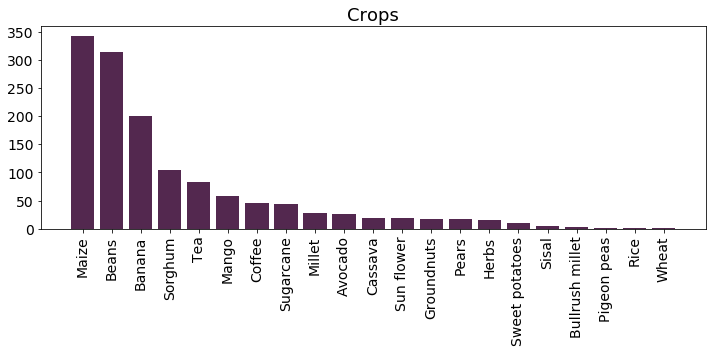

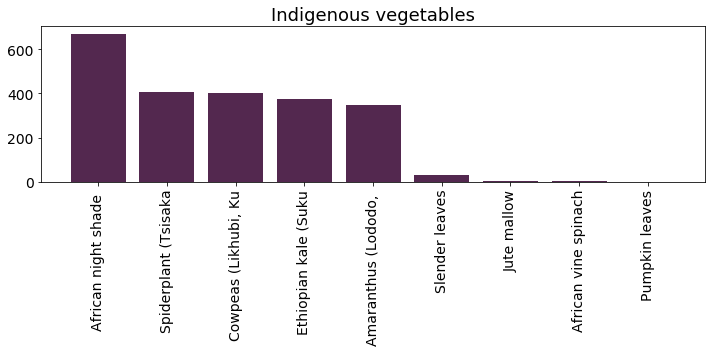

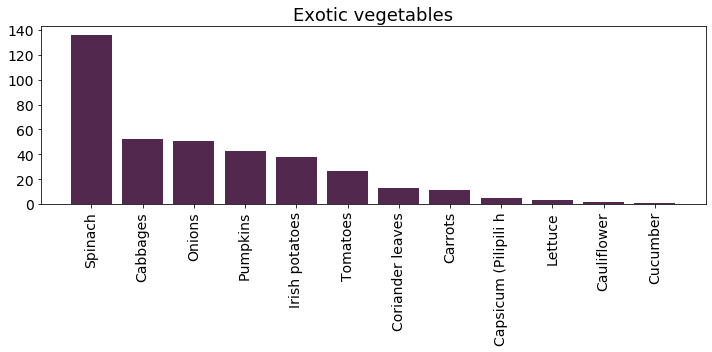

In [15]:
def plot_data(data, name):
    
    plt.figure(figsize=(10,5))
    plt.bar(data.index, data, color = "#53284f")
    plt.title(f"{name}", fontsize=18)
    
#   product names are too long, reduce signs up to 20 symbols
    x_labels = [x[:20] for x in data.index]
    
    plt.xticks(ticks = range(len(data.index)), 
    labels = x_labels, rotation = 90, fontsize=14)
    
    plt.yticks(fontsize=14)

    plt.tight_layout()
    plt.savefig(f"./Figs/kenia_{name}.pdf")
    plt.show()

# take into account variable level infos
kenia["Type"] = kenia["Type"].map(variable_labels["Type"])
    
for type_name in  ['Crops', 'Indigenous vegetables', 'Exotic vegetables']:
    subset = kenia["Product"][kenia["Type"] == type_name].value_counts()
    plot_data(subset, type_name)

Variable `Year` enables one to describe dynamics of popularity of every product.

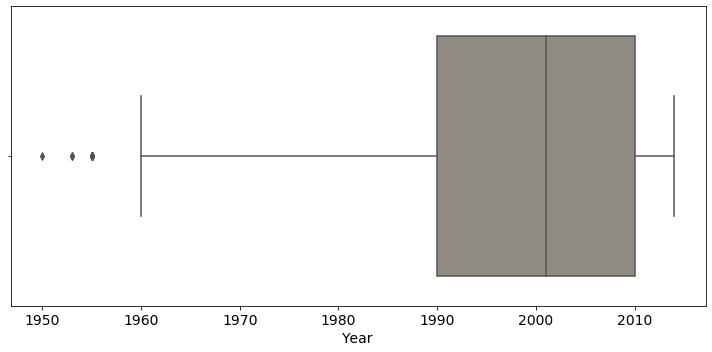

In [16]:
# year boxplot
plt.figure(figsize=(10,5))
sns.boxplot(year, color = "#928b81")
plt.xticks(fontsize=14)
plt.xlabel("Year", fontsize=14)
plt.tight_layout()
plt.show()

The earliest year since when the most popular product was cultivated?


In [17]:
top1 = products_popularity.index[0]
int(year[kenia["Product"] == top1].min())

1955

Dynamics of popularity for Top1 product

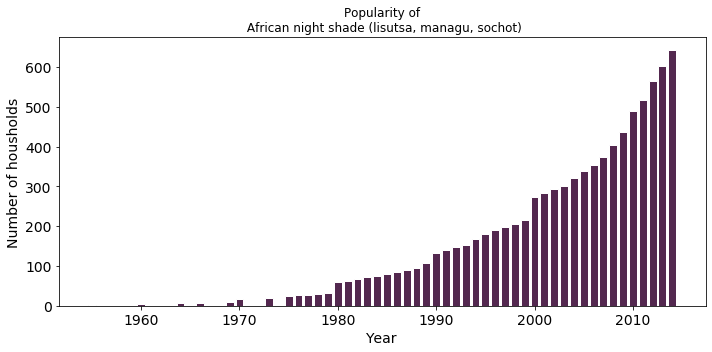

In [18]:
plt.figure(figsize=(10,5))
plt.bar(year[kenia["Product"] == top1].value_counts().sort_index().index,
        year[kenia["Product"] == top1].value_counts().sort_index().cumsum(),
        color = "#53284f", edgecolor = "w")

plt.xticks(fontsize=14)
plt.ylabel("Number of housholds", fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel("Year", fontsize=14)
plt.title(f"Popularity of\n {top1}")
plt.tight_layout()
plt.show()

## <font color=#175e54> Hypothesis Testing </font>

#### Test 1 (one-group mean)

$H_{0}$: A houshold produces 5 different products

$H_{A}$: A houshold produces not 5 different products

$H_{0}$: $\mu = 5$

$H_{A}$: $\mu \neq 5$, $\alpha = 0.05$

Sample:

In [19]:
prod = pd.pivot_table(data = kenia, index = "Houshold", 
               values = "Product", aggfunc = "count", fill_value=0)
prod.head()

,Product
Houshold,
1.0,2
2.0,2
3.0,5
4.0,8
5.0,9


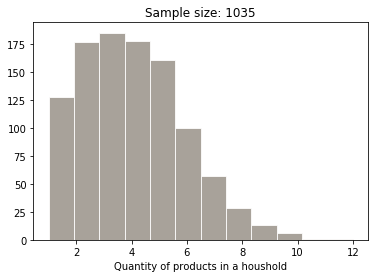

In [21]:
plt.hist(prod["Product"], bins = 12, edgecolor = "w", color ="#928b81", alpha = 0.8)
plt.xlabel("Quantity of products in a houshold")
plt.title(f"Sample size: {len(prod)}")
plt.show()

Sample size is large (>> 30), however we do not have the population SD. That is why we perform t-test.

$t = \frac{\overline{x} - \mu_{0}}{s/{\sqrt{n}}}$,

where $s$ is a sample standart deviation.

Degree of freedom is $df = n-1$ 

In [66]:
from scipy.stats import ttest_1samp
t_stat, pv = ttest_1samp(prod["Product"], popmean = 5)

In [67]:
if pv > 0.05:
    print('Accept null hypothesis that the means are equal.')
else:
    print('Reject the null hypothesis that the means are equal.')

Reject the null hypothesis that the means are equal.


In [69]:
if abs(t_stat) <= cv:
    print('Accept null hypothesis that the means are equal.')
else:
    print('Reject the null hypothesis that the means are equal.')

Reject the null hypothesis that the means are equal.


$p-value$ is small (< significance level=0.05) $\implies$ reject $H_{0}$

$p-value$ is large (> significance level=0.05) $\implies$ cannot reject $H_{0}$

#### Note

$H_{a}: \mu_{1} < \mu_{2} \implies p-value= P(T \leq t)$

$H_{a}: \mu_{1} > \mu_{2} \implies p-value= P(T \geq t)$

$H_{a}: \mu_{1} \neq \mu_{2} \implies p-value=P(T \leq -|t|)+P(T \geq |t|)=2P(T \geq |t|)$

where $t$ is observed test statistic

#### Test 2 (two-group mean)

$H_{0}$: A houshold produces equal quantity of bio and non-bio products.

$H_{A}$: Quantity of bio products products produced by a houshold are less than non-bio ones.

$H_{0}$: $ \mu_{1} = \mu_{2}$

$H_{A}$: $ \mu_{1} < \mu_{2}$

Significance level $\alpha = 0.05$

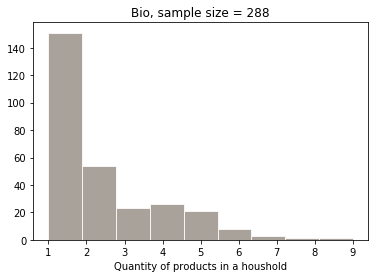

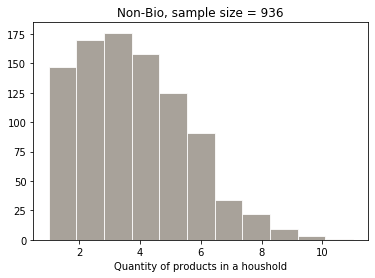

In [29]:
bio_filter = (kenia["Pesticide"]==0) & (kenia["Fertilizer"]==0)

bio =  pd.pivot_table(data = kenia[bio_filter], index = "Houshold", 
               values = "Product", aggfunc = "count", fill_value=0)

non_bio = pd.pivot_table(data = kenia[~bio_filter], index = "Houshold", 
               values = "Product", aggfunc = "count", fill_value=0)


plt.hist(bio["Product"], bins =9, edgecolor = "w", 
         color ="#928b81", alpha = 0.8)
plt.xlabel("Quantity of products in a houshold")
plt.title(f"Bio, sample size = {len(bio)}")
plt.show()


plt.hist(non_bio["Product"], bins = 11, edgecolor = "w", 
         color ="#928b81", alpha = 0.8)
plt.xlabel("Quantity of products in a houshold")
plt.title(f"Non-Bio, sample size = {len(non_bio)}")
plt.show()

In [30]:
bio["Label"] = "Bio"
non_bio["Label"] = "Non-Bio"

all_products = pd.concat([bio, non_bio])

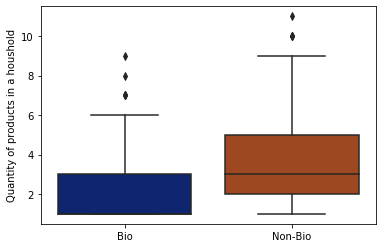

In [32]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

sns.boxplot(y=all_products["Product"], x=all_products["Label"], palette="dark")
plt.ylabel("Quantity of products in a houshold")
plt.xlabel("")
plt.show()

Verify conditions:

* Two independent random samples

* Sample sizes $n_{1} > 30$, $n_{2} > 30$

* The first sample is strong right skewed without otliers, the second one is slightly skewed with no otliers

Calculate the test statistic and degree of freedom *df*:

$ t = \frac{\overline{x_{1}} - \overline{x_{2}}}{SE_{(\overline{x_{1}} - \overline{x_{2}})} }$, where 

$\overline{x_{1}} - \overline{x_{2}}$ is the difference between the sample means

$SE_{(\overline{x_{1}} - \overline{x_{2}})}$ is the standart error of the difference between the sample means

$SE_{(\overline{x_{1}} - \overline{x_{2}})} = \sqrt{\frac{s_{1}^2}{n_{1}} + \frac{s_{2}^2}{n_{2}}}$

$s_{1}, s_2{}$ are samples standart deviations 
$s_{k} = \frac{1}{n_k-1}\displaystyle\sum_{i=1}^{n_{k}} (x_i - \overline{x_{k}} )$, $k=1,2$

$df = \displaystyle\frac{\big(\frac{s_1^2}{n_1} + \frac{s_2^2}{n_2} \big)^2}{\frac{(s_1^2/n_1)^2}{n_1-1} + \frac{(s_2^2/n_2)^2}{n_2-1}}$

The conservative aproach is to use the lowest $n$ of the two groups: $df=n_{lowest}-1$

In [52]:
import math
import scipy.stats

# calculate test statistic
s1 = np.std(bio["Product"], ddof = 1)
s2 = np.std(non_bio["Product"], ddof = 1)
n1 = len(bio)
n2 = len(non_bio)
df = min(n1, n2)
se = math.sqrt(s1**2/n1 + s2**2/n2)

t_stat = (bio["Product"].mean() - non_bio["Product"].mean())/se

# find p-value for the claculated statistic
pv = scipy.stats.t.cdf(t_stat, df)
print(f"t={t_stat}, p-value={pv}, df={df}")

t=-12.411266625807555, p-value=6.354949160224403e-29, df=288


In [53]:
if pv > 0.05:
    print('Accept null hypothesis that the means are equal.')
else:
    print('Reject the null hypothesis that the means are equal.')

Reject the null hypothesis that the means are equal.


In [64]:
# Find critical value for level alpha = 0.05
cv = scipy.stats.t.ppf(0.05, df)

-1.6501616556927265

In [65]:
if t_stat > cv:
    print('Accept null hypothesis that the means are equal.')
else:
    print('Reject the null hypothesis that the means are equal.')

Reject the null hypothesis that the means are equal.


### <font color="#175e54"> Regression Analysis </font>

Is there correleation between a number of products in a houshold and arces per houshold?

In [87]:
area = pd.pivot_table(data = kenia, index = "Houshold", 
               values = "Area", aggfunc = "sum", fill_value=0)
area.head()

,Area
Houshold,
1.0,1.250
2.0,0.250
3.0,12.350
4.0,1.400
5.0,0.796


In [88]:
prod["Product"].corr(area["Area"])

0.26899414654430936

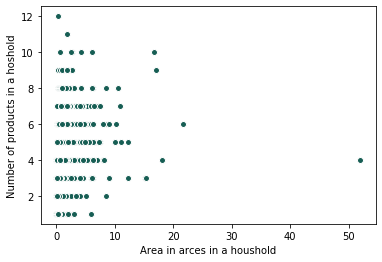

In [86]:
plt.scatter(area["Area"],prod["Product"], color="#175e54",edgecolor='w')
plt.xlabel("Area in arces in a houshold")
plt.ylabel("Number of products in a hoshold")
plt.show()

Is there correleation between a sold part of yield of a product and acres per product in housholds?

In [89]:
# find all products that were measured for sale and after harvest 
# in the same units

filter = kenia["Sold_Unit"] == kenia["Produced_Unit"]
kenia = kenia[filter]
 
# create new variable that contains percentage of produced products that were sold after harvest
kenia["Sold_percent"] = kenia["Sold_Qty"]/kenia["Produced_Qty"]*100

kenia["Sold_percent"].where(kenia["Sold_percent"] <= 100, inplace=True)

kenia[["Sold_Qty", "Produced_Qty", "Sold_percent"]]

kenia["Sold_Unit"] = kenia["Sold_Unit"].map(variable_labels["Sold_Unit"])

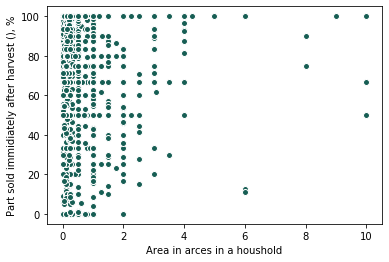

In [94]:
plt.scatter(kenia["Area"],kenia["Sold_percent"], color="#175e54",edgecolor='w')
plt.xlabel("Area in arces in a houshold")
plt.ylabel("Part sold immidiately after harvest, %")
plt.show()

In [96]:
kenia["Sold_percent"].corr(kenia["Area"])

-0.0044934516127245515